## Photon-Electron Dataset

In [1]:
import torch
from qml_ssl.data import create_data_loader, load_pe_img
from qml_ssl.models.img_classical import Conv_Classifier, Conv_SupContrastive,  LinearProbe
from qml_ssl.utils.plotting import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training
from qml_ssl.utils.training import get_trainer

import warnings

# Ignore all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
electron_file = "../../data/PhotonElectron/electron.hdf5"
photon_file = "../../data/PhotonElectron/photon.hdf5"
classes = (0, 1)
reduced_dim = 16
dataset_size = 20000

particle_data = load_pe_img(electron_file, photon_file, reduced_dim=reduced_dim, dataset_size=dataset_size)

train_loader = create_data_loader(particle_data["train_data"], particle_data["train_labels"])
val_loader = create_data_loader(particle_data["val_data"], particle_data["val_labels"], shuffle=False)
test_loader = create_data_loader(particle_data["test_data"], particle_data["test_labels"], shuffle=False)

In [15]:
batch = next(iter(train_loader))

inputs, labels = batch
print(f"Input shape: {inputs.shape}")
print(f"Label shape: {labels.shape}")

Input shape: torch.Size([64, 2, 16, 16])
Label shape: torch.Size([64])


CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_classifier_pe/version_6


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/fa6d2c9a19034ad1aac986ff9e1cfa25

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type               | Params | Mode 
-----------------------------------------------------------------------
0  | encoder                | ConvEncoder        | 768    | train
1  | encoder.layers         | ModuleList         | 768    | train
2  | encoder.layers.0       | ConvUnit           | 168    | train
3  | encoder.layers.0.conv  | Conv2d             | 152    | train
4  | encoder.layers.0.bn    | BatchNorm2d        | 16     | train
5  | encoder.layers.0.activ | ReLU               | 0      | train
6  | encoder.layers.0.pool  | MaxPool2d          | 0      | train
7  | encoder.layers.1       | ConvUnit           | 600    | train
8  | encoder.layers.1.conv  | Conv2d             | 584    | train
9  | encoder.layers.1.bn    | BatchNorm2d        | 16     | train
10 | enco

Epoch 19: 100%|██████████| 438/438 [00:08<00:00, 48.87it/s, v_num=fa25, valid_loss=0.680, valid_acc=0.573, train_loss=0.667, train_acc=0.595]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 438/438 [00:08<00:00, 48.77it/s, v_num=fa25, valid_loss=0.680, valid_acc=0.573, train_loss=0.667, train_acc=0.595]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_classifier_pe
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/fa6d2c9a19034ad1aac986ff9e1cfa25
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.5591428279876709, 0.5967857241630554)
COMET INFO:     train_loss [20] : (0.6667975783348083, 0.6858184933662415)
COMET INFO:     valid_acc [20]  : (0.5479999780654907, 0.5743333101272583)
COMET INFO:     valid_loss [20] : (0.6797165870666504, 0.6934166550636292)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_classifier_pe
COMET INFO:   Parameters:
COMET

Embeddings after Training


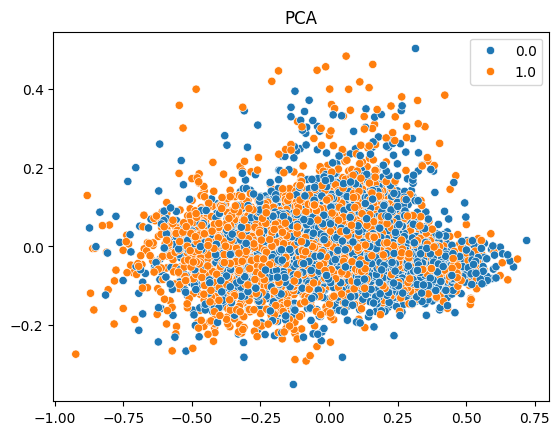

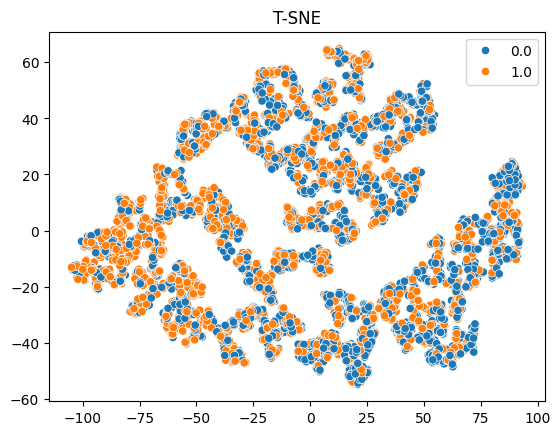

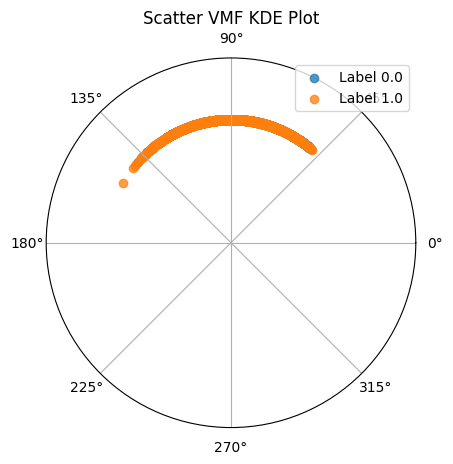

In [3]:
model = Conv_Classifier(input_channel_num=2, proj_dim=2, classes=classes, lr=1e-3)

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_classifier_pe", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# plot_training(log_dir)

In [4]:
# test_result = trainer.test(dataloaders=test_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_supcontrast_pe/version_2


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/00e92c96cc0f4ad6b8b341df10777936

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                           | Type              | Params | Mode 
------------------------------------------------------------------------------
0  | encoder                        | ConvEncoder       | 768    | train
1  | encoder.layers                 | ModuleList        | 768    | train
2  | encoder.layers.0               | ConvUnit          | 168    | train
3  | encoder.layers.0.conv          | Conv2d            | 152    | train
4  | encoder.layers.0.bn            | BatchNorm2d       | 16     | train
5  | encoder.layers.0.activ         | ReLU              | 0      | train
6  | encoder.layers.0.pool          | MaxPool2d         | 0      | train
7  | encoder.layers.1               | ConvUnit          | 600    | train
8  | encoder.layers.1.conv          | Conv2d            | 584    | trai

Epoch 19: 100%|██████████| 438/438 [00:11<00:00, 38.03it/s, v_num=7936, valid_loss=1.010, train_loss=1.010]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 438/438 [00:11<00:00, 38.00it/s, v_num=7936, valid_loss=1.010, train_loss=1.010]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_supcontrast_pe
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/00e92c96cc0f4ad6b8b341df10777936
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (1.0037553310394287, 1.0063751935958862)
COMET INFO:     valid_loss [20] : (0.9947313070297241, 1.0803083181381226)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_supcontrast_pe
COMET INFO:   Parameters:
COMET INFO:     activ_type         : relu
COMET INFO:     hidden_channel_num : 8
COMET INFO:     input_channel_num  : 2
COMET INFO:     layer_num        

Embeddings after Training


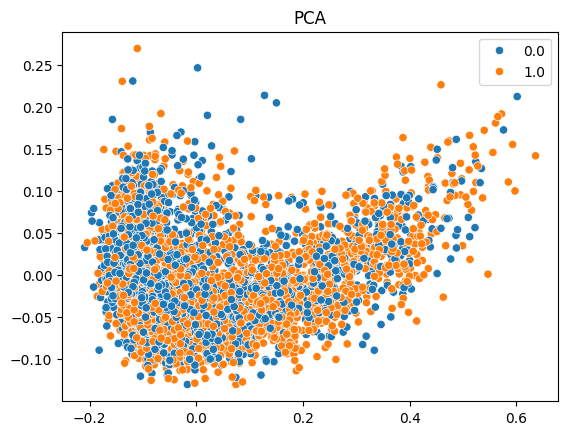

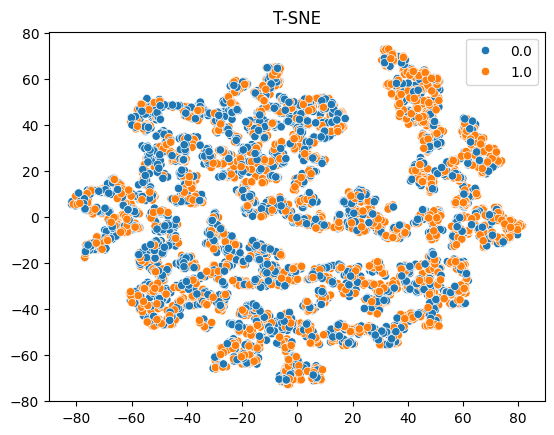

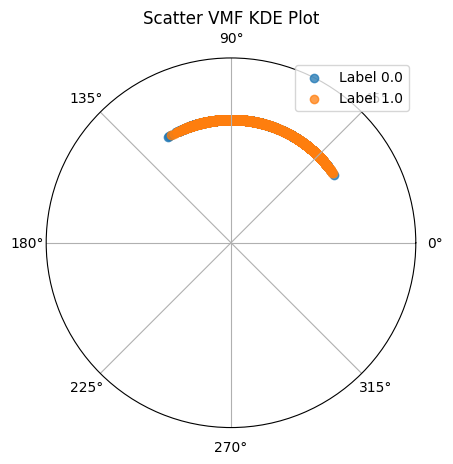

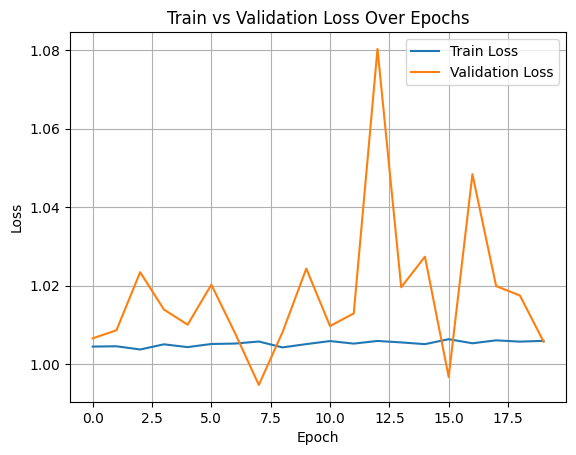

In [5]:
model = Conv_SupContrastive(input_channel_num=2, proj_dim=2, lr=1e-3, loss="ContrastiveLoss")

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_supcontrast_pe", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

In [6]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=1)

trainer, log_dir = get_trainer("probing_supcontrast_pe", monitor_metric="valid_loss")
trainer.fit(linear_probe, train_loader, val_loader)

# test_result = trainer.test(dataloaders=test_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_supcontrast_pe/version_1


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/3dc83b2dca37448e92fbe615625729cd

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                            | Type                | Params | Mode 
-------------------------------------------------------------------------------------------------
0  | pretrained_model                                | Conv_SupContrastive | 786    | eval 
1  | pretrained_model.encoder                        | ConvEncoder         | 768    | eval 
2  | pretrained_model.encoder.layers                 | ModuleList          | 768    | eval 
3  | pretrained_model.encoder.layers.0               | ConvUnit            | 168    | eval 
4  | pretrained_model.encoder.layers.0.conv          | Conv2d              | 152    | eval 
5  | pretrained_model.encoder.layers.0.bn            | BatchNorm2d         | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ         | ReLU      

Epoch 19: 100%|██████████| 438/438 [00:07<00:00, 59.51it/s, v_num=29cd, valid_loss=0.682, valid_acc=0.569, train_loss=0.670, train_acc=0.598]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 438/438 [00:07<00:00, 59.46it/s, v_num=29cd, valid_loss=0.682, valid_acc=0.569, train_loss=0.670, train_acc=0.598]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_supcontrast_pe
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/3dc83b2dca37448e92fbe615625729cd
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.5392857193946838, 0.5979642868041992)
COMET INFO:     train_loss [20] : (0.6701464056968689, 0.6921430826187134)
COMET INFO:     valid_acc [20]  : (0.5663333535194397, 0.5705000162124634)
COMET INFO:     valid_loss [20] : (0.6809976696968079, 0.6845494508743286)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_supcontrast_pe
COMET INFO:   Uploads:
